In [23]:
# import pandas
import pandas as pd

# import Kmeans 
from sklearn.cluster import KMeans

# import Scaler
from sklearn.preprocessing import StandardScaler

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# import colour map
import matplotlib.cm as cm

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [24]:
# Import Data
detailed_transactions_df = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/all_transactions_data.csv')
transactions = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_transactions_df.csv')
checkings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_checkings_df.csv')
savings = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_savings_df.csv')
credit = pd.read_csv('/Users/brittanyharding/LHL-Projects/mini-project-III/clean_data/merged_credit_df.csv')

## KMeans clustering on transactions using KMeans++ initialization

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

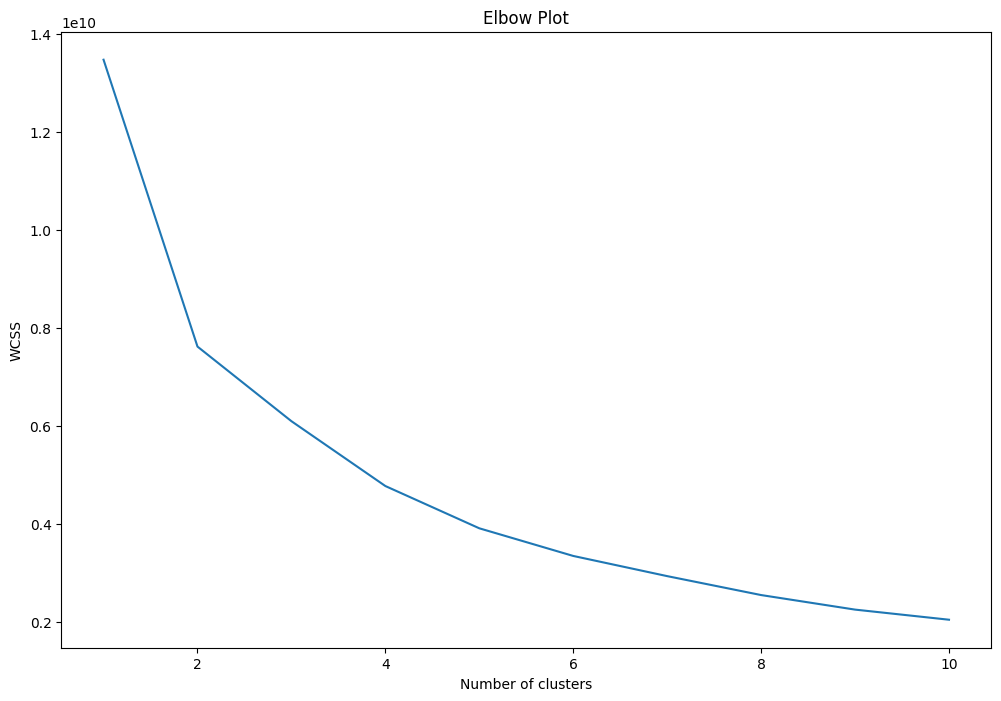

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Copy the transactions dataframe
transactions_copy = transactions.copy()

# Extract relevant columns
X = transactions_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Initialize an empty list to store the WCSS values
wcss = []

# Fit KMeans model with different number of clusters (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

transactions_copy = transactions.copy()

# Extract relevant columns
X = transactions_copy[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Fit KMeans model with 3 clusters and kmeans++ initialization
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the transactions dataframe
transactions_copy['cluster_labels'] = cluster_labels

# Analyze the clusters
transactions_copy.groupby('cluster_labels').mean()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
cluster_labels,,,,,,,,,,,,,,,,,,,
0,1.362984e+06,2.327869,23.169399,16.732240,0.016393,2.890710,0.027322,3.371585,2.699454,10.628415,20.786885,6.393443,11.054645,38.726776,13.951805,115.776120,-321.982186,-4370.377377,-4254.758142
1,1.362987e+06,1.707317,18.804878,14.951220,0.243902,11.024390,0.000000,1.000000,1.926829,11.951220,13.195122,8.487805,6.512195,22.829268,23.526348,245.934634,4069.889756,3625.644390,3871.341951
2,1.362993e+06,2.486364,16.968182,12.959091,0.045455,11.470455,0.154545,1.900000,2.102273,9.545455,14.865909,6.243182,6.579545,22.718182,18.386337,63.423795,482.192159,-40.572545,22.692114


## Plot clusters with PCA

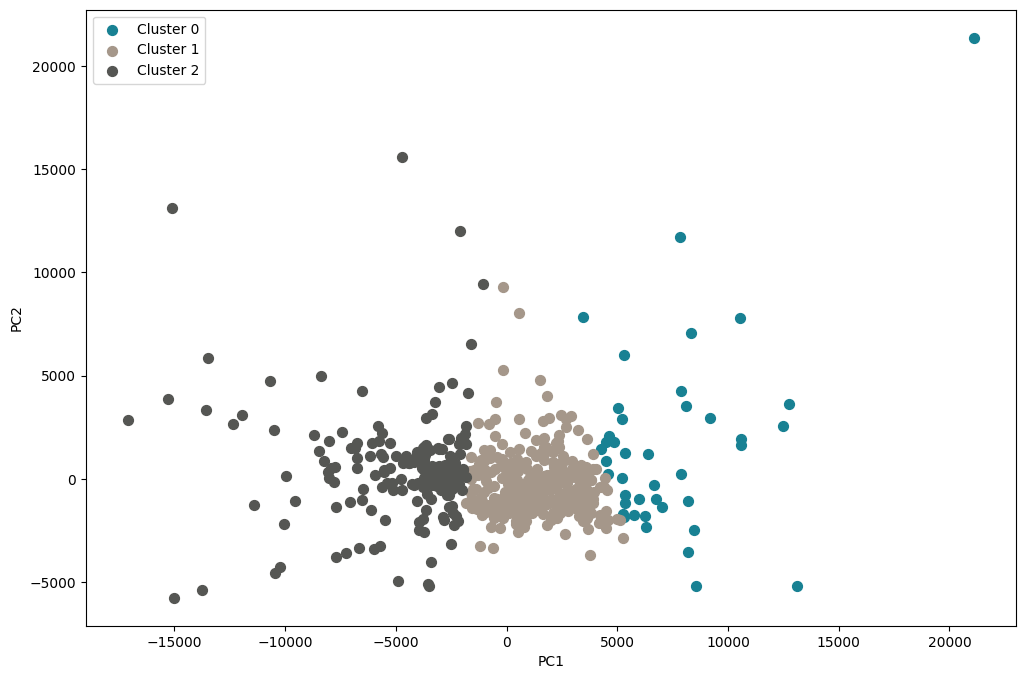

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select relevant columns for PCA
X = transactions[['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']]

# Apply PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the transformed data with cluster labels
colors = ['#188193', '#a5978a', '#555653', '#b7bfc3', '#79868d', '#35948e', '#075773']
for i in range(3):
    plt.scatter(X_pca[cluster_labels==i, 0], X_pca[cluster_labels==i, 1], s=50, c=colors[i], label='Cluster '+str(i))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [29]:
transactions_copy.head(100)

,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt,cluster_labels
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99,2
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39,2
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52,2
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36,2
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1362622,2,31,32,1,0,0,1,1,16,20,7,10,55,17.784807,444.15,13887.73,1894.47,2338.08,1
96,1362623,0,0,8,0,11,0,0,7,12,11,0,5,14,25.994194,2.12,156.32,-261.61,-259.49,2
97,1362624,9,28,4,0,0,0,0,1,12,1,12,3,5,20.630833,73.04,-371.99,-107.84,-34.80,2
98,1362625,0,28,4,0,3,4,1,0,3,3,12,2,3,14.363636,79.20,-202.11,2499.06,2577.18,2


In [32]:
mean_data = transactions_copy.groupby('cluster_labels').mean()
mean_data

,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt
cluster_labels,,,,,,,,,,,,,,,,,,,
0,1.362984e+06,2.327869,23.169399,16.732240,0.016393,2.890710,0.027322,3.371585,2.699454,10.628415,20.786885,6.393443,11.054645,38.726776,13.951805,115.776120,-321.982186,-4370.377377,-4254.758142
1,1.362987e+06,1.707317,18.804878,14.951220,0.243902,11.024390,0.000000,1.000000,1.926829,11.951220,13.195122,8.487805,6.512195,22.829268,23.526348,245.934634,4069.889756,3625.644390,3871.341951
2,1.362993e+06,2.486364,16.968182,12.959091,0.045455,11.470455,0.154545,1.900000,2.102273,9.545455,14.865909,6.243182,6.579545,22.718182,18.386337,63.423795,482.192159,-40.572545,22.692114


## Plot Radar Chart

In [37]:
import plotly.graph_objects as go
import plotly.express as px

# Define the categories and their labels for the radar chart
categories = ['interest_amt', 'new_balance', 'principal_amt', 'tran_amt']

fig = go.Figure()

for i in mean_data.index:
    df = mean_data.loc[i][categories]
    values = df.values.tolist()
    fig.add_trace(go.Scatterpolar(
      r=values,
      theta=categories,
      fill='toself',
      name = f"Cluster {i}"
    ))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[mean_data[categories].values.min(), mean_data[categories].values.max()]
    )),
  showlegend=True,
  title='Radar Chart of Cluster Attributes'
)

fig.show()


# Hierarchal Clustering

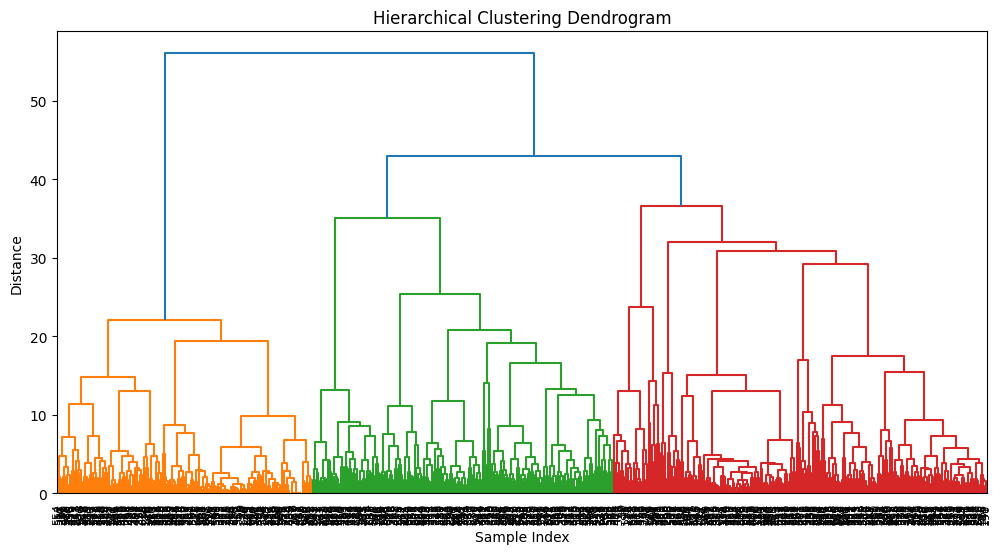

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Extract the variables for clustering
X = transactions.iloc[:, 1:20].values

# Normalize the variables to have zero mean and unit variance
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform hierarchical clustering using Ward's method and 3 clusters
Z = linkage(X, method='ward')
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X)

# Plot the dendrogram
plt.figure(figsize=(12, 6))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Extract the variables for clustering
X = transactions.iloc[:, 1:20].values

# Normalize the variables to have zero mean and unit variance
sc = StandardScaler()
X = sc.fit_transform(X)

# Perform hierarchical clustering using Ward's method and 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(X)

# Create a copy of the transactions table
transactions_h_clustered = transactions.copy()

# Add the cluster labels as a new column in the copy of the transactions table
transactions_h_clustered['Cluster'] = clusters


In [55]:
transactions_h_clustered

,cust_id,CA,CG,DP,FA,FK,FM,FP,FU,IN,IQ,PM,TR,WD,avg_days_btwn_trans,interest_amt,new_balance,principal_amt,tran_amt,Cluster
0,1362480,1,15,20,1,25,0,1,2,12,23,12,13,32,26.182107,378.28,1254.83,1807.71,2185.99,0
1,1362484,1,38,30,0,0,0,3,13,15,15,12,10,50,18.816515,33.08,1847.77,302.31,335.39,2
2,1362485,7,50,16,0,23,0,0,1,0,19,12,13,30,5.223484,56.93,-1009.03,-981.91,-925.52,0
3,1362486,0,0,5,0,0,0,0,0,24,3,0,5,13,29.791667,57.20,3428.51,-1165.56,-1108.36,1
4,1362487,3,23,3,0,0,0,12,0,19,12,4,6,21,21.713894,51.12,-134.13,-3603.25,-3553.12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,1363490,0,0,0,0,0,0,0,0,12,0,0,0,0,30.363636,34.24,2301.53,0.00,34.24,1
660,1363491,0,0,5,0,0,0,0,0,3,1,0,6,3,5.647059,1.26,17.82,-188.89,-187.63,1
661,1363492,1,14,11,0,25,0,5,0,12,26,12,14,33,29.748299,977.69,-5646.61,-3835.22,-2857.53,2
662,1363493,0,0,17,0,0,0,3,19,13,17,0,11,38,11.862812,38.12,2607.51,-3885.63,-3847.51,2
